In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import spacy
import gensim.corpora as corpora
from gensim.corpora import Dictionary
nlp = spacy.load('en_core_web_sm')
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [2]:
df_dataset = pd.read_csv('/Users/XXXX-2/git_projs/bertopic_dignity/new_datasets/datasets/df_dataset.csv')
df_dataset.head(5)

,Unnamed: 0,itemid,docname,appno,judgementdate,law,facts,conclusion,full_text,judgement_type,...,phi3_summaries,facts_ne_removed,bertsum_ne_removed,textrank_ne_removed,cleaned_facts,cleaned_bertsum,cleaned_textrank,cleaned_facts_pos_removed,cleaned_bertsum_pos_removed,cleaned_textrank_pos_removed
0,0,001-209033,CASE OF HANDZHIYSKI v. BULGARIA,10783/14,06/04/2021 00:00:00,### THE LAW\n\n- ALLEGED VIOLATION OF ARTICLE ...,THE FACTS 2. The applicant was born in 1971 a...,"### FOR THESE REASONS, THE COURT\n\n- Declares...",FOURTH SECTIONCASE OF HANDZHIYSKI v. BULGARIA(...,CHAMBER,...,"On 28 December 2012, a man from Blagoevgrad p...",THE . The was born in and lives in . He was...,"['Together, these provided majority of out ...","['Following parliamentary elections on , on ...",. born lives . represented . Ekimdz...,"['Together, provided majority total ...","['Following parliamentary elections , new ...",". lives . . Ekimdzhiev , lawyers . . Agent , ....","[ 'Together , majority members . ' , ' another...","[ elections , , Plamen ( whose member – ) , me..."
1,1,001-153349,CASE OF NALBANDYAN v. ARMENIA,9935/06;23339/06,31/03/2015 00:00:00,### THE LAW\n\n- I. JOINDER OF THE APPLICATIO...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,"### FOR THESE REASONS, THE COURT UNANIMOUSLY\n...",THIRD SECTION CASE OF NALBANDYAN v. ARMENIA (A...,CHAMBER,...,The domestic laws relevant to this case perta...,THE I. THE CIRCUMSTANCES OF THE . The applic...,['On the and applicants were formally arre...,"['In doing so, the examined and dismissed the ...",". CIRCUMSTANCES . applicants born , ...",[' applicants formally arrested connec...,"[' , examined dismissed applicants’ all...",". CIRCUMSTANCES . applicants , respectively . ...",[ ' applicants formally connection murder . ' ...,"[ ' , applicants allegations grounds : ( ) all..."
2,2,001-104911,CASE OF R.R. v. POLAND,27617/04,26/05/2011 00:00:00,### THE LAW\n\n- 90. The applicant complained...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 6....,"### FOR THESE REASONS, THE COURT\n\n- 1. Join...",FOURTH SECTION CASE OF R.R. v. POLAND (Applica...,CHAMBER,...,The International Federation of Gynaecology a...,THE I. THE CIRCUMSTANCES OF THE . The was b...,"['On the was admitted to in T., within h...","['The also that, in member where abortion i...",. CIRCUMSTANCES . born . . Early v...,"[' admitted ., within covered , ...","[' , member abortion permitted number...",". CIRCUMSTANCES . . . B . . , ( later ) . , B....","[ ' . , within , advice . ' , ' doctors B. , R...","[ ' , member abortion number reasons , always ..."
3,3,001-150648,CASE OF CIORCAN AND OTHERS v. ROMANIA,29414/09;44841/09,27/01/2015 00:00:00,### THE LAW\n\n- I. JOINDER OF THE APPLICATIO...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,"### FOR THESE REASONS, THE COURT, UNANIMOUSLY,...",THIRD SECTION CASE OF CIORCAN AND OTHERS v. RO...,CHAMBER,...,The document discusses various incidents invo...,THE I. THE CIRCUMSTANCES OF THE . The applic...,['He was considered to require of medical tre...,"[' applicants: , , , , , (Biga), , , , (Big...",. CIRCUMSTANCES . applicants thirtyseven...,"[' considered require medical treatment.',...","[' applicants: , , , , , (Biga), , , , (Big...",. CIRCUMSTANCES . applicants nationals . neigh...,"[ ' treatment . ' , ' certificate , wound exco...","[ ' applicants : , , , , , ( Biga ) , , , , ( ..."
4,4,001-83882,CASE OF PETROPOULOU-TSAKIRIS v. GREECE,44803/04,06/12/2007 00:00:00,### THE LAW\n\n- I. ALLEGED VIOLATION OF ARTI...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,"### FOR THESE REASONS, THE COURT\n\n- 1. Join...",FIRST SECTION CASE OF PETROPOULOUTSAKIRIS v. G...,CHAMBER,...,The Greek Helsinki Monitor's report on the ca...,THE I. THE CIRCUMSTANCES OF THE . The is of...,"['THE I. THE CIRCUMSTANCES OF THE .', 'On ...","['On police officers, the head of the secu...",. CIRCUMSTANCES . ethnic origin live...,"[' . CIRCUMSTANCES .', ' , . ., ...","[' police officers, head security po...",". CIRCUMSTANCES 

In [3]:
clean_facts = df_dataset['cleaned_facts']

In [4]:
clean_facts[0]

'.    born    lives  .   represented   . Ekimdzhiev  , lawyers practising  . .    represented   Agent,   .         . Following parliamentary elections  ,    new   formed, led   Plamen   supported     (whose main member   –    ),   eightyfour members  , ,   thirtysix members  ,   chairman  another political , ,  ,     member  . Together,  provided  majority       total   members  . . Following parliamentary elections  ,    new   formed, led   Plamen   supported     (whose main member   –    ),   eightyfour members  , ,   thirtysix members  ,   chairman  another political , ,  ,     member  . Together,  provided  majority       total   members  . .      wave      erupted  various cities  towns throughout  .  ,  demonstrators’ main grievance   appointment     ,  wealthy businessman  ,  chairman  .    continued   midJanuary .    poll carried   , fortythree per cent   respondents supported  antigovernment protests,      view    continue;  percent declared     participate  .  another  poll c

In [5]:
import re

def further_preprocessing(text):
    
    # Convert the text to lowercase
    text = text.lower()

    # Remove anything that is not a word or space
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Lemmatize the text
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    
    # Remove single character strings
    tokens = [token for token in tokens if len(token) > 1]

    text = " ".join(tokens)

    # Remove the word "applicant"
    text = re.sub(r'\bapplicant\b', '', text)

    # Remove duplicate whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove any extra leading or trailing whitespace left after processing
    text = text.strip()
    
    return text


In [6]:
clean_facts = clean_facts.apply(further_preprocessing)
clean_facts[0]

'bear life represent ekimdzhiev lawyer practise represent agent follow parliamentary election new form lead plaman support whose main member eightyfour member thirtysix member chairman another political member together provide majority total member follow parliamentary election new form lead plaman support whose main member eightyfour member thirtysix member chairman another political member together provide majority total member wave erupt various city town throughout demonstrator main grievance appointment wealthy businessman chairman continue midjanuary poll carry fortythree per cent respondent support antigovernment protest view continue percent declare participate another poll carry period another fortyone per cent respondent say good political solution resign new parliamentary election take place step wave erupt various city town throughout demonstrator main grievance appointment wealthy businessman chairman continue midjanuary poll carry fortythree per cent respondent support an

In [7]:
from transformers import AutoTokenizer

# Load the tokenizer for the all-MiniLM-L6-v2 model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Define the function to split a document into chunks
def split_into_chunks(document, max_tokens):
    # Tokenize the document
    tokens = tokenizer.tokenize(document)
    
    # If the document is empty, return an empty list
    if not tokens:
        return []
    
    # Split the document into chunks of size less than max_tokens
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i + max_tokens]
        chunks.append(chunk)
        
    return chunks

# Function to verify that the total number of tokens remains the same across a list of documents
def verify_token_counts_for_documents(documents, max_tokens):
    total_original_tokens = 0
    total_chunked_tokens = 0
    
    # Process each document in the list
    for idx, document in enumerate(documents):
        # Tokenize the original document and count the tokens
        original_tokens = tokenizer.tokenize(document)
        original_token_count = len(original_tokens)
        total_original_tokens += original_token_count
        
        # Chunk the document and count the tokens in the chunks
        chunks = split_into_chunks(document, max_tokens)
        chunked_token_count = sum(len(chunk) for chunk in chunks)
        total_chunked_tokens += chunked_token_count
        
        # Verify for each document
        if original_token_count == chunked_token_count:
            print(f"Document {idx + 1}: Token count verification passed. {original_token_count} tokens before and after chunking.")
        else:
            print(f"Document {idx + 1}: Token count verification failed. {original_token_count} tokens before but {chunked_token_count} tokens after chunking.")
    
    # Verify for all documents combined
    if total_original_tokens == total_chunked_tokens:
        print(f"Overall token count verification passed: {total_original_tokens} tokens before and {total_chunked_tokens} tokens after chunking.")
    else:
        print(f"Overall token count verification failed: {total_original_tokens} tokens before but {total_chunked_tokens} tokens after chunking.")



max_tokens = 256

# Run the token count verification for the list of documents
verify_token_counts_for_documents(clean_facts, max_tokens)

/Users/XXXX-2/opt/anaconda3/envs/python38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Token indices sequence length is longer than the specified maximum sequence length for this model (941 > 512). Running this sequence through the model will result in indexing errors


Document 1: Token count verification passed. 941 tokens before and after chunking.
Document 2: Token count verification passed. 1864 tokens before and after chunking.
Document 3: Token count verification passed. 3261 tokens before and after chunking.
Document 4: Token count verification passed. 4007 tokens before and after chunking.
Document 5: Token count verification passed. 725 tokens before and after chunking.
Document 6: Token count verification passed. 805 tokens before and after chunking.
Document 7: Token count verification passed. 1886 tokens before and after chunking.
Document 8: Token count verification passed. 1577 tokens before and after chunking.
Document 9: Token count verification passed. 811 tokens before and after chunking.
Document 10: Token count verification passed. 400 tokens before and after chunking.
Document 11: Token count verification passed. 866 tokens before and after chunking.
Document 12: Token count verification passed. 19 tokens before and after chunkin

In [8]:
from transformers import AutoTokenizer

# Load the tokenizer for the all-MiniLM-L6-v2 model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Define the maximum token length
MAX_TOKENS = 256


def split_into_chunks(document, max_tokens):
    # Tokenize the document
    tokens = tokenizer.tokenize(document)
    
    # Split the document into chunks of size less than max_tokens
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i + max_tokens] #If i + max_tokens goes beyond the length of the token list, it only takes the remaining tokens (Python slicing handles this gracefully).
        chunks.append(chunk)           #chunk of one fact are not mixed with the chunks of other facts
        
    return chunks

# Process each long document and split them into chunks
all_chunks = []
for doc in clean_facts:
    doc_chunks = split_into_chunks(doc, MAX_TOKENS)
    all_chunks.extend(doc_chunks)

# Convert token chunks back to text
text_chunks = [tokenizer.convert_tokens_to_string(chunk) for chunk in all_chunks]

print("Total number of chunks:", len(text_chunks))

Token indices sequence length is longer than the specified maximum sequence length for this model (941 > 512). Running this sequence through the model will result in indexing errors


Total number of chunks: 9803


In [2]:
import os
import itertools
from tqdm import tqdm
from gensim.models.coherencemodel import CoherenceModel
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

/Users/XXXX-2/opt/anaconda3/envs/python38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#code for coherence inspired by MaartenGr's comment on this issue: https://github.com/MaartenGr/BERTopic/issues/90 (April 16, 2021)

#note that instead of cleaned_docs we have cleaned_facts

def compute_coherence(bertopic_model, clean_facts):
    # Extract vectorizer and analyzer from BERTopic
    vectorizer = bertopic_model.vectorizer_model
    analyzer = vectorizer.build_analyzer()
    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names()
    tokens = [analyzer(doc) for doc in clean_facts]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

    # Evaluate
    coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence
    
    

def compute_topic_diversity(bertopic_model, top_n):
    topics = bertopic_model.get_topics()
    unique_words = set()
    total_words = 0
    
    for topic_id in range(len(topics)-1):
        topic_words = [word for word, _ in topics[topic_id][:top_n]]
        unique_words.update(topic_words)
        total_words += len(topic_words)
    
    topic_diversity = len(unique_words) / total_words
    return topic_diversity
    
    
    

In [11]:
# Initialize the representation model, vectorizer model, and ctfidf model

# create model

#coherence fail at no of cluster = 1

param_grid = {
   "n_clusters": [2, 3, 4, 5 ,6 ,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "mmr_diversity": [0.2, 0.4, 0.6, 0.8, 1]
}
#since it was not possible to run bertopic with the gensim dictionary and corpus created for other 3 models, we decided to use the 
#Countvectorizer library to create bigrams and set max_df=0.3

vectorizer_model = CountVectorizer(ngram_range = (1,2), stop_words="english")  
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True, bm25_weighting=True)


combinations = list(itertools.product(
    param_grid['n_clusters'],
    param_grid['mmr_diversity']
))


# Initialize a list to store results
results = []

for n_clusters, mmr_diversity in tqdm(combinations):
    representation_model = MaximalMarginalRelevance(diversity=mmr_diversity, top_n_words=30)
    cluster_model = KMeans(n_clusters=n_clusters)

    topic_model = BERTopic(hdbscan_model=cluster_model,ctfidf_model=ctfidf_model,vectorizer_model=vectorizer_model,representation_model=representation_model, embedding_model = 'all-MiniLM-L6-v2', top_n_words=30)
    topics, probabilities = topic_model.fit_transform(text_chunks)

    topic_coherence = compute_coherence(topic_model, text_chunks)
    topic_diversity = compute_topic_diversity(topic_model, 10)

    # Get the number of topics generated by the model
    num_topics = len(topic_model.get_topics())

    #Save the model with a unique name

    model_name = f"bertopic_chunks_30_words_n_clusters_{n_clusters}_diversity_mmr_{mmr_diversity}.bertopic"
    topic_model.save(model_name)

    results.append({
        'model_name': model_name,
        'num_topics': n_clusters,
        'mmr_diversity':mmr_diversity,
        'coherence': topic_coherence,
        'topic_diversity': topic_diversity
    })


results_df = pd.DataFrame(results)
results_df.to_csv("bertopic_chunks_30_words_grid_search_results_final.csv", index=False)

print("Grid search completed and results saved.")
    

  0%|                                                                                                                               | 0/95 [00:00<?, ?it/s]/Users/XXXX-2/opt/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
2024-09-17 22:42:15,693 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
100%|███████

Grid search completed and results saved.


In [4]:
import pandas as pd
import csv
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
file_results_bertopic = '/Users/XXXX-2/git_projs/bertopic_dignity/bertopic_chunks_30_words_grid_search_results_final.csv'

df_metrics_bertopic = pd.read_csv(file_results_bertopic)
df_metrics_bertopic

,model_name,num_topics,mmr_diversity,coherence,topic_diversity
0,bertopic_chunks_30_words_n_clusters_2_diversit...,2,0.2,0.682292,1.000000
1,bertopic_chunks_30_words_n_clusters_2_diversit...,2,0.4,0.682292,1.000000
2,bertopic_chunks_30_words_n_clusters_2_diversit...,2,0.6,0.682292,1.000000
3,bertopic_chunks_30_words_n_clusters_2_diversit...,2,0.8,0.682292,1.000000
4,bertopic_chunks_30_words_n_clusters_2_diversit...,2,1.0,0.682292,1.000000
5,bertopic_chunks_30_words_n_clusters_3_diversit...,3,0.2,0.739829,1.000000
6,bertopic_chunks_30_words_n_clusters_3_diversit...,3,0.4,0.743727,1.000000
7,bertopic_chunks_30_words_n_clusters_3_diversit...,3,0.6,0.743087,0.900000
8,bertopic_chunks_30_words_n_clusters_3_diversit...,3,0.8,0.738426,1.000000
9,bertopic_chunks_30_words_n_clusters_3_diversit...,3,1.0,0.739829,1.000000


In [6]:
# Create a new column `quality` by multiplying `coherence` and `topic_diversity`
df_metrics_bertopic['quality'] = df_metrics_bertopic['coherence'] * df_metrics_bertopic['topic_diversity']

In [7]:
# Group by `num_topics` and pick the row with the maximum `quality`
df_grouped_bertopic = df_metrics_bertopic.loc[df_metrics_bertopic.groupby('num_topics')['quality'].idxmax()].copy()

# Sort the dataframe on `num_topics` in ascending order
df_grouped_bertopic = df_grouped_bertopic.sort_values('num_topics')
df_grouped_bertopic

,model_name,num_topics,mmr_diversity,coherence,topic_diversity,quality
0,bertopic_chunks_30_words_n_clusters_2_diversit...,2,0.2,0.682292,1.000000,0.682292
6,bertopic_chunks_30_words_n_clusters_3_diversit...,3,0.4,0.743727,1.000000,0.743727
12,bertopic_chunks_30_words_n_clusters_4_diversit...,4,0.6,0.745872,0.933333,0.696147
17,bertopic_chunks_30_words_n_clusters_5_diversit...,5,0.6,0.791401,0.950000,0.751831
21,bertopic_chunks_30_words_n_clusters_6_diversit...,6,0.4,0.773026,0.980000,0.757565
25,bertopic_chunks_30_words_n_clusters_7_diversit...,7,0.2,0.778374,0.983333,0.765401
32,bertopic_chunks_30_words_n_clusters_8_diversit...,8,0.6,0.785983,0.957143,0.752298
39,bertopic_chunks_30_words_n_clusters_9_diversit...,9,1.0,0.783865,0.950000,0.744672
40,bertopic_chunks_30_words_n_clusters_10_diversi...,10,0.2,0.776288,0.955556,0.741786
45,bertopic_chunks_30_words_n_clusters_11_diversi...,11,0.2,0.790047,0.950000,0.750545


In [17]:
df_grouped_bertopic = df_grouped_bertopic.rename(columns={
    'coherence': 'Coherence',
    'topic_diversity': 'Topic Diversity',
    'quality': 'Quality'
})

# To confirm the renaming, you can print the columns
print(df_grouped_bertopic.columns)

Index(['model_name', 'num_topics', 'mmr_diversity', 'Coherence',
       'Topic Diversity', 'Quality'],
      dtype='object')


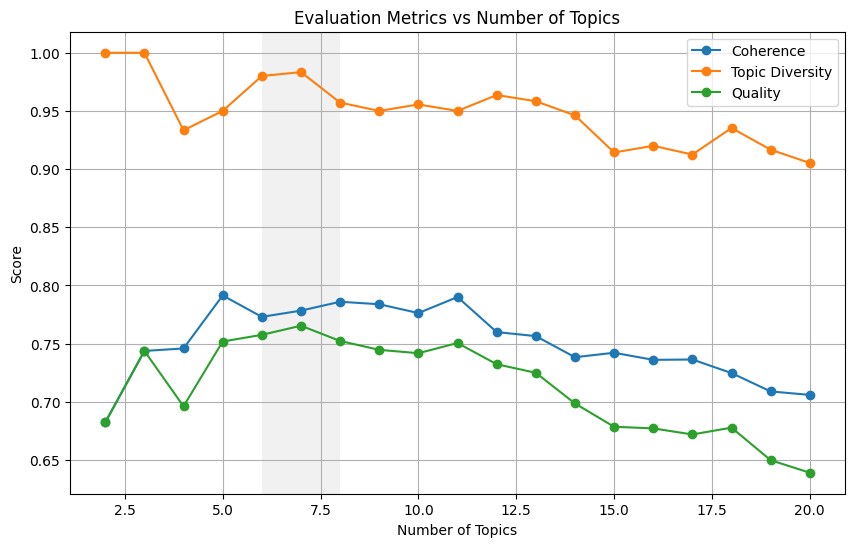

In [18]:
import matplotlib.pyplot as plt

# Filter the dataframe `df_grouped` to get the row where the `quality` is maximum and `num_topics` is greater than 5
df_max_quality = df_grouped_bertopic[(df_grouped_bertopic['Quality'] == df_grouped_bertopic[df_grouped_bertopic['num_topics'] > 5]['Quality'].max())]

# Get the `num_topics` corresponding to the maximum `quality` from `df_max_quality`
max_quality_num_topics = df_max_quality['num_topics'].values[0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot each metric as a line
for metric in ['Coherence', 'Topic Diversity', 'Quality']:
    plt.plot(df_grouped_bertopic['num_topics'], df_grouped_bertopic[metric], label=metric, marker='o')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs Number of Topics')

# Add legend
plt.legend(loc='upper right')

# Highlight the area of maximum quality (num_topics > 5)
plt.axvspan(max_quality_num_topics - 1, max_quality_num_topics + 1, facecolor='lightgray', alpha=0.3)

# Show the plot
plt.grid(True)
plt.savefig('bertopic_chunks_30_words.png')
plt.show()


In [9]:
from bertopic import BERTopic
#Load the best performing bertopic model and show the topics 
model_7 = "/Users/XXXX-2/git_projs/bertopic_dignity/bertopic_chunks_30_words_n_clusters_7_diversity_mmr_0.2.bertopic"
topic_model_7 = BERTopic.load(model_7)


topic_model_7.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,3055,0_person_public_information_member,"[person, public, information, member, provide,...",[reinforce power governor example public offic...
1,1,2864,1_police_officer_police officer_injury,"[police, officer, police officer, injury, inve...",[date abrasion syrq calf cause blunt object in...
2,2,1646,2_cell_inmate_provide_sentence,"[cell, inmate, provide, sentence, bed, measure...",[might within cell consider ensure remand esta...
3,3,1395,3_medical_treatment_doctor_patient,"[medical, treatment, doctor, patient, care, ex...",[interview necessary physically examine medica...
4,4,788,4_child_school_parent_woman,"[child, school, parent, woman, sexual, abortio...",[sexual intercourse obiter per certificate reg...
5,5,37,5_complain confinement_confinement metal_set a...,"[complain confinement, confinement metal, set ...",[application set append table complain confine...
6,6,18,6_complain degrading_treatment raise_set appen...,"[complain degrading, treatment raise, set appe...",[application set append table complain degradi...


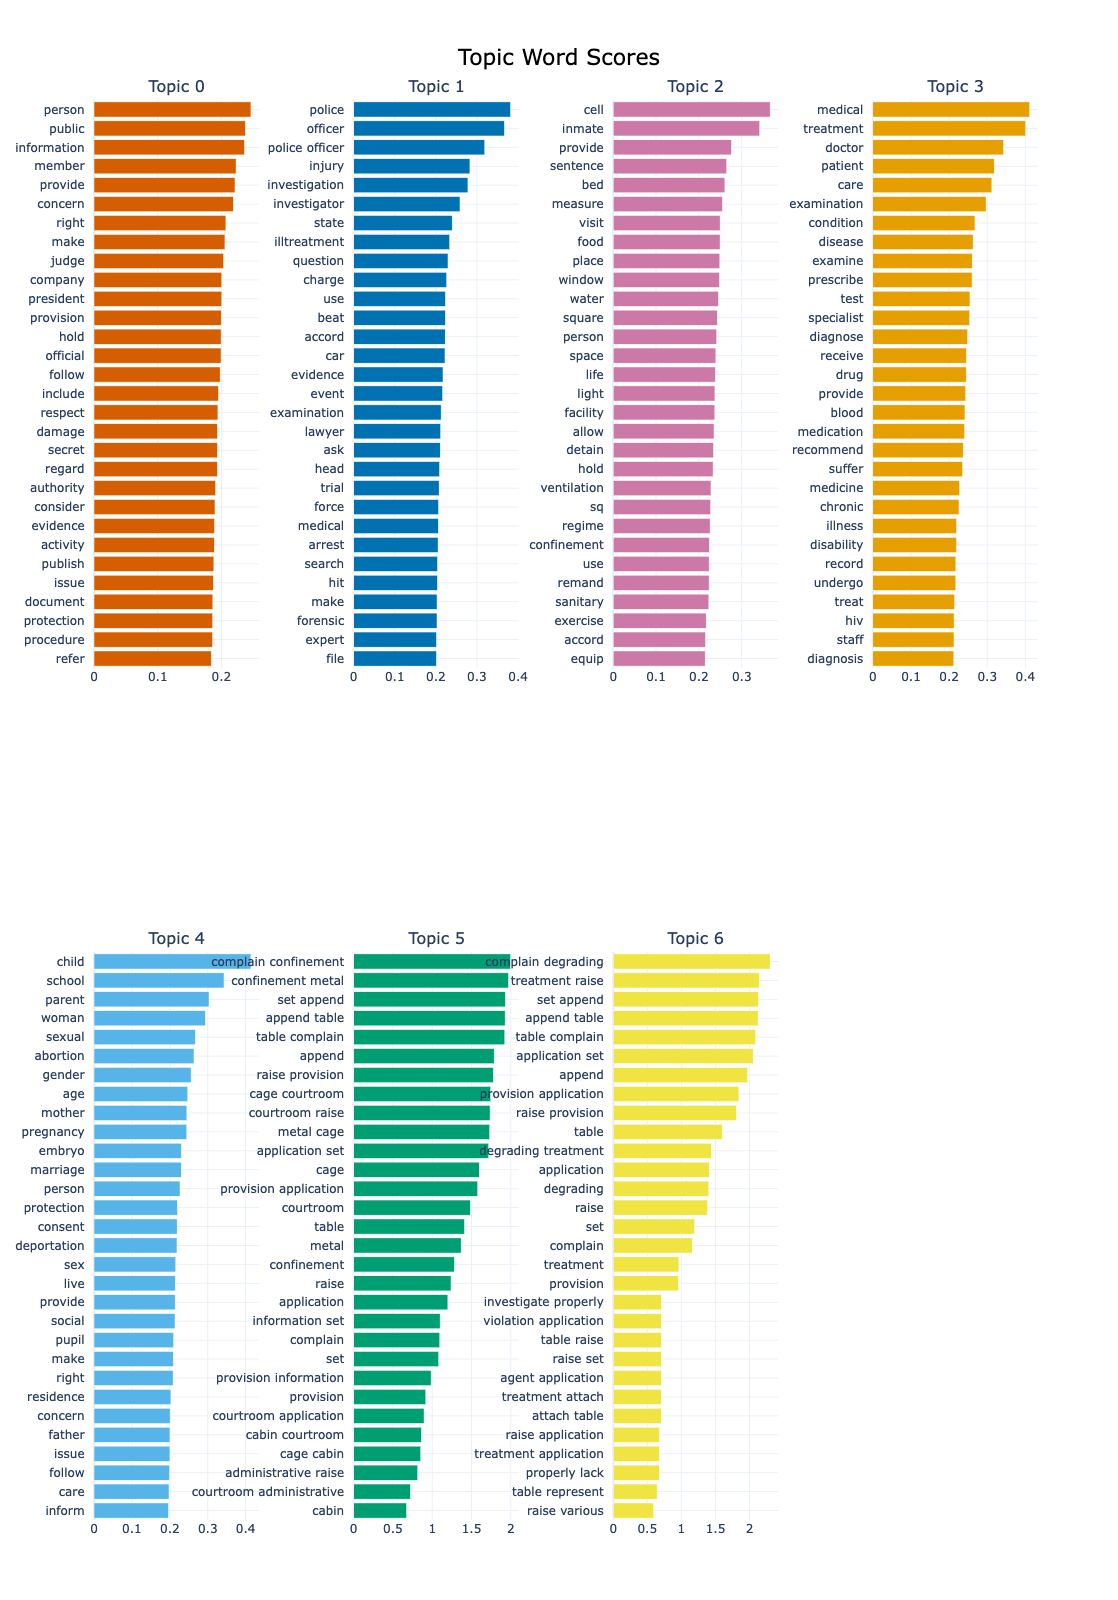

In [12]:
fig_ = topic_model_7.visualize_barchart(n_words= 30, top_n_topics=7, height = 800, width = 300)
# Save the plot as a PNG file
fig_.write_image("/Users/XXXX-2/git_projs/bertopic_dignity/bertopic_chunks_30_words_best_topic_model_barchart.png")

# Display the plot in Jupyter
fig_.show()
